In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
import joblib

# Load the dataset
# Assuming the dataset is in a CSV file named 'salary_data.csv'
df= pd.read_csv('/content/drive/MyDrive/Project/salary_data.csv.csv')
df.head()

,age,workclass,education,occupation,Gender,native-country,salary,Year_of_experience
0,39,State-gov,Bachelors,Adm-clerical,Male,United-States,39343,1.1
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,United-States,46205,1.3
2,38,Private,HS-grad,Handlers-cleaners,Male,United-States,37731,1.5
3,53,Private,11th,Handlers-cleaners,Male,United-States,43525,2.0
4,28,Private,Bachelors,Prof-specialty,Female,Cuba,39891,2.2


Check the summary of the data frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 999 non-null    int64  
 1   workclass           999 non-null    object 
 2   education           999 non-null    object 
 3   occupation          999 non-null    object 
 4   Gender              999 non-null    object 
 5   native-country      999 non-null    object 
 6   salary              999 non-null    int64  
 7   Year_of_experience  999 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [ ]:
df.shape

(999, 8)

 Cleaning of Data

In [ ]:
df.isnull().sum()

age                   0
workclass             0
education             0
occupation            0
Gender                0
native-country        0
salary                0
Year_of_experience    0
dtype: int64

In [ ]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

Determine number of unique values in the ‘occupation’ column

In [ ]:
df['occupation'].value_counts()

Craft-repair         122
Prof-specialty       121
Exec-managerial      120
Sales                110
Other-service        106
Adm-clerical          91
Machine-op-inspct     61
Transport-moving      52
Tech-support          44
Handlers-cleaners     43
Farming-fishing       31
Protective-serv       16
Priv-house-serv        3
Armed-Forces           1
Name: occupation, dtype: int64

Determine the top 10 Occupation with the most no. of designations

In [ ]:
df['occupation'].value_counts().head(10)

Craft-repair         122
Prof-specialty       121
Exec-managerial      120
Sales                110
Other-service        106
Adm-clerical          91
Machine-op-inspct     61
Transport-moving      52
Tech-support          44
Handlers-cleaners     43
Name: occupation, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.bar(x=df['occupation'].value_counts().head(10).index,
       y=df['occupation'].value_counts().head(10),
       title='Top 10 Most Popular Job Designations',
      labels={'y':'No. of designations','x':'Occupation'},
      color_discrete_sequence = px.colors.sequential.Viridis)
fig.update_layout(
    xaxis=dict(tickfont=dict(size=15)),
    yaxis=dict(tickfont=dict(size=15)))

Determine the Top 10 Job Titles with the highest annual salaries

In [ ]:
job_title_salary = df.groupby('occupation')['salary'].mean()
job_title_salary = job_title_salary.sort_values().tail(10)
job_title_salary

occupation
Craft-repair          74012.237705
Transport-moving      75170.173077
Exec-managerial       76104.900000
Tech-support          77596.750000
Machine-op-inspct     77629.557377
Farming-fishing       77943.741935
Other-service         77943.915094
Sales                 78304.554545
Armed-Forces         101302.000000
Priv-house-serv      104763.000000
Name: salary, dtype: float64

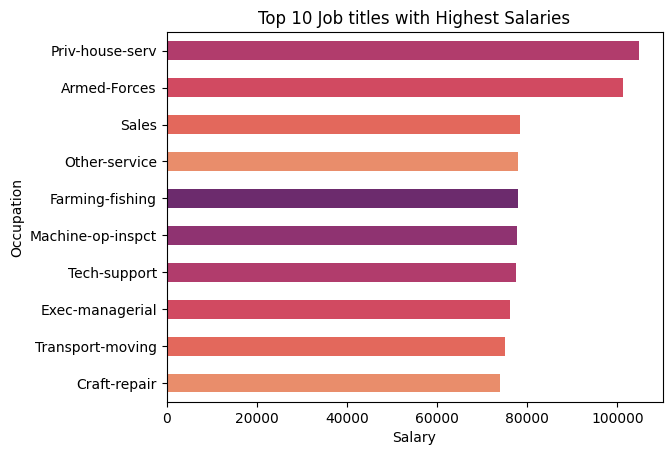

In [ ]:
import seaborn as sns
plt.figure()
job_title_salary.plot(kind='barh', color=sns.color_palette('flare'))
plt.xlabel('Salary')
plt.ylabel('Occupation')
plt.title('Top 10 Job titles with Highest Salaries')
plt.show()

Determine average salary range per year of experience

In [ ]:
group = df.groupby('Year_of_experience')['salary'].mean().sort_values()

fig = px.bar(x=group.index, y=group.values, color=group.index, text=group.values,
             title='Average Salary according to Year_of_experience')

fig.update_layout(xaxis_title="Year_of_experience", yaxis_title="Salary in USD")
fig.show()

 Determine the salary distribution

In [ ]:
salarymean = df['salary'].mean()
salarymean


75658.01194353963

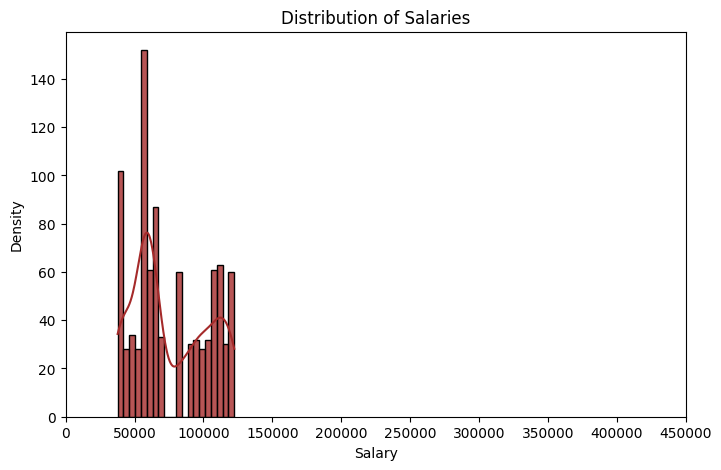

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary'], alpha=0.8, color='brown', bins=20, kde=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.xticks(range(0, 500000, 50000))
plt.title('Distribution of Salaries')
plt.show()